In [ ]:
!apt-get update
# Download Java Virtual Machine (JVM)
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,590 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,323 kB]
Get:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease [24.3 kB]
Get:13 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Pack

In [ ]:
# Download Spark
!wget -q https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
# Unzip the file
!tar xf spark-3.2.1-bin-hadoop3.2.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = '/content/spark-3.2.1-bin-hadoop3.2'

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark import SparkContext

In [ ]:
import pyspark
from pyspark.sql import SparkSession

sc = SparkSession.builder.appName("DataFrame").config('spark.ui.port', '4050').getOrCreate()

In [ ]:
#!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
#!unzip ngrok-stable-linux-amd64.zip
#get_ipython().system_raw('./ngrok http 4050 &')

--2023-04-03 05:05:01--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 54.237.133.81, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.28M  18.0MB/s    in 0.7s    

2023-04-03 05:05:02 (18.0 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13921656/13921656]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ngrok                   


In [ ]:
#!curl -s http://localhost:4040/api/tunnels


{"tunnels":[{"name":"command_line (http)","uri":"/api/tunnels/command_line%20%28http%29","public_url":"http://bb31-34-125-16-162.ngrok.io","proto":"http","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":2,"gauge":0,"rate1":7.430001957643837e-8,"rate5":0.000463965496227878,"rate15":0.0009103774783890222,"p50":30818324385.5,"p90":31124397686,"p95":31124397686,"p99":31124397686},"http":{"count":4,"rate1":8.652726214541392e-8,"rate5":0.0008326877791252075,"rate15":0.0017561852294710658,"p50":3882998.5,"p90":147965285,"p95":147965285,"p99":147965285}}},{"name":"command_line","uri":"/api/tunnels/command_line","public_url":"https://bb31-34-125-16-162.ngrok.io","proto":"https","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":3,"gauge":0,"rate1":0.000002038650835310781,"rate5":0.0011541398319079613,"rate15":0.0015966389098493086,"p50":31788128556,"p90":33277721878,"p95":33277721878,"p99":33277721878},"http":{"count":8,"rate

In [ ]:
#!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ngrok                   


In [ ]:
#ngrok config add-authtoken 2NtyD4meHxcfccic93APkIq9BuA_42kEoeXtJXoJ3sqLbzktk

SyntaxError: ignored

In [ ]:
#!curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://bb31-34-125-16-162.ngrok.io


In [ ]:
sc

In [ ]:
#creeate a spark session
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("emotional recognation ").getOrCreate()

In [ ]:
#read the dataset
df=spark.read.csv("/content/tweet_emotions.csv",header=True,inferSchema=True )

In [ ]:
df.show()

In [ ]:
df.columns

In [ ]:
df.select('sentiment','content').show()

In [ ]:
df=df.select('content','sentiment')

In [ ]:
df.show(5)

In [ ]:
df.groupBy('sentiment').count().show()

In [ ]:
#check for missing value
df.toPandas()['sentiment'].isnull().sum()

In [ ]:
# feature extraction
#CountVectorizer
#TFIDF
#wordEmbedding
#hashingTF

In [ ]:
import pyspark.ml.feature

In [ ]:
dir(pyspark.ml.feature)

['Binarizer',
 'BucketedRandomProjectionLSH',
 'BucketedRandomProjectionLSHModel',
 'Bucketizer',
 'ChiSqSelector',
 'ChiSqSelectorModel',
 'CountVectorizer',
 'CountVectorizerModel',
 'DCT',
 'ElementwiseProduct',
 'FeatureHasher',
 'HasFeaturesCol',
 'HasHandleInvalid',
 'HasInputCol',
 'HasInputCols',
 'HasLabelCol',
 'HasMaxIter',
 'HasNumFeatures',
 'HasOutputCol',
 'HasOutputCols',
 'HasRelativeError',
 'HasSeed',
 'HasStepSize',
 'HasThreshold',
 'HasThresholds',
 'HashingTF',
 'IDF',
 'IDFModel',
 'Imputer',
 'ImputerModel',
 'IndexToString',
 'Interaction',
 'JavaEstimator',
 'JavaMLReadable',
 'JavaMLWritable',
 'JavaModel',
 'JavaParams',
 'JavaTransformer',
 'MaxAbsScaler',
 'MaxAbsScalerModel',
 'MinHashLSH',
 'MinHashLSHModel',
 'MinMaxScaler',
 'MinMaxScalerModel',
 'NGram',
 'Normalizer',
 'OneHotEncoder',
 'OneHotEncoderModel',
 'PCA',
 'PCAModel',
 'Param',
 'Params',
 'PolynomialExpansion',
 'QuantileDiscretizer',
 'RFormula',
 'RFormulaModel',
 'RegexTokenizer',
 'R

In [ ]:
from pyspark.ml.feature import Tokenizer,StopWordsRemover,CountVectorizer,IDF
from pyspark.ml.feature import StringIndexer

In [ ]:
df.show(5)

+--------------------+----------+
|             content| sentiment|
+--------------------+----------+
|@tiffanylue i kno...|     empty|
|Layin n bed with ...|   sadness|
|Funeral ceremony....|   sadness|
|wants to hang out...|enthusiasm|
|@dannycastillo We...|   neutral|
+--------------------+----------+
only showing top 5 rows



In [ ]:
#Stages for pipeline
tokenizer =Tokenizer(inputCol='content',outputCol='mytokens')
stopword_remover=StopWordsRemover(inputCol='mytokens',outputCol='filtered_tokens')
vectorizer= CountVectorizer(inputCol='filtered_tokens',outputCol='rawFeatures')
idf=IDF(inputCol='rawFeatures',outputCol='vectorizedFeatures')

In [ ]:
labelEncoder = StringIndexer(inputCol='sentiment',outputCol='label').fit(df)

In [ ]:
labelEncoder.transform(df).show(5)

+--------------------+----------+-----+
|             content| sentiment|label|
+--------------------+----------+-----+
|@tiffanylue i kno...|     empty|  9.0|
|Layin n bed with ...|   sadness|  3.0|
|Funeral ceremony....|   sadness|  3.0|
|wants to hang out...|enthusiasm| 10.0|
|@dannycastillo We...|   neutral|  0.0|
+--------------------+----------+-----+
only showing top 5 rows



In [ ]:
labelEncoder.labels

['neutral',
 'worry',
 'happiness',
 'sadness',
 'love',
 'surprise',
 'fun',
 'relief',
 'hate',
 'empty',
 'enthusiasm',
 'boredom',
 'anger']

In [ ]:
label_dict={'neutral':0.0,
 'worry':1.0,
 'happiness':2.0,
 'sadness':3.0,
 'love':4.0,
 'surprise':5.0,
 'fun':6.0,
 'relief':7.0,
 'hate':8.0,
 'empty':9.0,
 'enthusiasm':10.0,
 'boredom':11.0,
 'anger':12.0}

In [ ]:
df = labelEncoder.transform(df)

In [ ]:
df.show()

+--------------------+----------+-----+
|             content| sentiment|label|
+--------------------+----------+-----+
|@tiffanylue i kno...|     empty|  9.0|
|Layin n bed with ...|   sadness|  3.0|
|Funeral ceremony....|   sadness|  3.0|
|wants to hang out...|enthusiasm| 10.0|
|@dannycastillo We...|   neutral|  0.0|
|Re-pinging @ghost...|     worry|  1.0|
|I should be sleep...|   sadness|  3.0|
|Hmmm. http://www....|     worry|  1.0|
|@charviray Charle...|   sadness|  3.0|
|@kelcouch I'm sor...|   sadness|  3.0|
|    cant fall asleep|   neutral|  0.0|
|Choked on her ret...|     worry|  1.0|
|Ugh! I have to be...|   sadness|  3.0|
|@BrodyJenner if u...|   sadness|  3.0|
|        Got the news|  surprise|  5.0|
|The storm is here...|   sadness|  3.0|
|@annarosekerr agreed|      love|  4.0|
|So sleepy again a...|   sadness|  3.0|
|@PerezHilton lady...|     worry|  1.0|
|How are YOU convi...|   sadness|  3.0|
+--------------------+----------+-----+
only showing top 20 rows



In [ ]:
#split Dataset
(trainDF,testDF) = df.randomSplit((0.7,0.3),seed=42)

In [ ]:
#Estimator
from pyspark.ml.classification import LogisticRegression

In [ ]:
lr=LogisticRegression(featuresCol='vectorizedFeatures',labelCol='label')

In [ ]:
# Building the pipeline

In [ ]:
from pyspark.ml import Pipeline

In [ ]:
pipeline = Pipeline(stages=[tokenizer,stopword_remover,vectorizer,idf,lr])

In [ ]:
pipeline

Pipeline_9ba1f8ba0084

In [ ]:
pipeline.stages

Param(parent='Pipeline_9ba1f8ba0084', name='stages', doc='a list of pipeline stages')

In [ ]:
lr_model = pipeline.fit(trainDF)

In [ ]:
lr_model

PipelineModel_e5b7f8c34766

In [ ]:
predictions = lr_model.transform(testDF)

In [ ]:
predictions.show()

+--------------------+----------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|             content| sentiment|label|            mytokens|     filtered_tokens|         rawFeatures|  vectorizedFeatures|       rawPrediction|         probability|prediction|
+--------------------+----------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|#3wordsaftersex I...|   sadness|  3.0|[#3wordsaftersex,...|[#3wordsaftersex,...|(56877,[473,5106]...|(56877,[473,5106]...|[8.55460647939477...|[2.84644223141026...|       3.0|
|#3wordsaftersex i...|   sadness|  3.0|[#3wordsaftersex,...|[#3wordsaftersex,...|(56877,[63,5106],...|(56877,[63,5106],...|[15.0237728367405...|[9.50653650672851...|       3.0|
|#Ajax #php! Just ...|     worry|  1.0|[#ajax, #php!, ju...|[#ajax, #php!, th...|(56877,[86,236,49...|(56877,[86,23

In [ ]:
predictions.columns

['content',
 'sentiment',
 'label',
 'mytokens',
 'filtered_tokens',
 'rawFeatures',
 'vectorizedFeatures',
 'rawPrediction',
 'probability',
 'prediction']

In [ ]:
predictions.select('rawPrediction','probability','sentiment','label','prediction').show(10)

+--------------------+--------------------+---------+-----+----------+
|       rawPrediction|         probability|sentiment|label|prediction|
+--------------------+--------------------+---------+-----+----------+
|[8.55460647939477...|[2.84644223141026...|  sadness|  3.0|       3.0|
|[15.0237728367405...|[9.50653650672851...|  sadness|  3.0|       3.0|
|[1.45547326937356...|[1.26183843001997...|    worry|  1.0|       1.0|
|[-2.4002283711888...|[2.47386194078386...|     hate|  8.0|       1.0|
|[-6.0586262753878...|[6.49182338296164...|    worry|  1.0|       1.0|
|[-47.105279973346...|[1.52066013242034...|  neutral|  0.0|       1.0|
|[-0.2359934182387...|[6.14475922485804...|    worry|  1.0|       3.0|
|[18.1098355652949...|[0.03533153747567...|  neutral|  0.0|       7.0|
|[2.52449644896947...|[5.67815719571314...|    worry|  1.0|       7.0|
|[6.18681356014903...|[6.89974843309266...|    worry|  1.0|       2.0|
+--------------------+--------------------+---------+-----+----------+
only s

In [ ]:
### Model Evaluation
# Accuracy
# Precision
# F1score

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol='label',predictionCol='prediction',metricName='accuracy')

In [ ]:
accuracy = evaluator.evaluate(predictions)

In [ ]:
accuracy

0.22861938732689888

In [ ]:
#### Method 2: Precision. F1Score (Classification Report)
from pyspark.mllib.evaluation import MulticlassMetrics

In [ ]:
lr_metric = MulticlassMetrics(predictions['label','prediction'].rdd)

/content/spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
print("Accuracy:",lr_metric.accuracy)
print("Precision:",lr_metric.precision(1.0))
print("Recall:",lr_metric.recall(1.0))
print("F1Score:",lr_metric.fMeasure(1.0))

Accuracy: 0.22861938732689888
Precision: 0.28881737731295254
Recall: 0.28870124648170487
F1Score: 0.2887593002211944


In [ ]:
#confusion Matrix



In [ ]:
y_true = predictions.select('label')
y_true = y_true.toPandas()
y_pred = predictions.select('prediction')
y_pred = y_pred.toPandas()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
cm = confusion_matrix(y_true,y_pred)

In [ ]:
cm

array([[829, 495, 302, 323, 155, 104,  66, 114,  55,  63,  39,  21,   8],
       [523, 718, 201, 419, 148,  93,  61, 107,  89,  70,  33,  16,   8],
       [314, 206, 342, 146, 195,  66,  64,  91,  31,  27,  35,   6,   1],
       [281, 396, 124, 380,  97,  55,  34,  61,  57,  46,  20,  13,   7],
       [192, 152, 200, 121, 287,  45,  26,  44,  20,  31,  23,  11,   1],
       [170, 121,  73,  76,  57,  44,  23,  32,  22,  21,  16,   5,   0],
       [123,  84,  98,  59,  49,  16,  31,  29,  15,  17,  17,   2,   3],
       [110,  81,  56,  60,  39,  18,  13,  37,  13,  12,   8,   5,   2],
       [ 75, 112,  13,  97,  11,   9,   9,  10,  41,   9,   1,   8,   3],
       [ 71,  50,  26,  30,  10,   8,   7,  16,  12,   8,   3,   1,   1],
       [ 55,  45,  23,  33,  12,  13,   8,  12,   7,   6,   6,   2,   0],
       [ 15,  16,   5,   8,   1,   0,   0,   3,   1,   3,   0,   0,   1],
       [  6,  11,   1,   4,   0,   0,   0,   1,   2,   3,   5,   0,   1]])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
label_dict.keys()

dict_keys(['neutral', 'worry', 'happiness', 'sadness', 'love', 'surprise', 'fun', 'relief', 'hate', 'empty', 'enthusiasm', 'boredom', 'anger'])

In [ ]:
class_names=['neutral',
 'worry',
 'happiness',
 'sadness',
 'love',
 'surprise',
 'fun',
 'relief',
 'hate',
 'empty',
 'enthusiasm',
 'boredom',
 'anger']

Confusion matrix, without normalization
[[829 495 302 323 155 104  66 114  55  63  39  21   8]
 [523 718 201 419 148  93  61 107  89  70  33  16   8]
 [314 206 342 146 195  66  64  91  31  27  35   6   1]
 [281 396 124 380  97  55  34  61  57  46  20  13   7]
 [192 152 200 121 287  45  26  44  20  31  23  11   1]
 [170 121  73  76  57  44  23  32  22  21  16   5   0]
 [123  84  98  59  49  16  31  29  15  17  17   2   3]
 [110  81  56  60  39  18  13  37  13  12   8   5   2]
 [ 75 112  13  97  11   9   9  10  41   9   1   8   3]
 [ 71  50  26  30  10   8   7  16  12   8   3   1   1]
 [ 55  45  23  33  12  13   8  12   7   6   6   2   0]
 [ 15  16   5   8   1   0   0   3   1   3   0   0   1]
 [  6  11   1   4   0   0   0   1   2   3   5   0   1]]


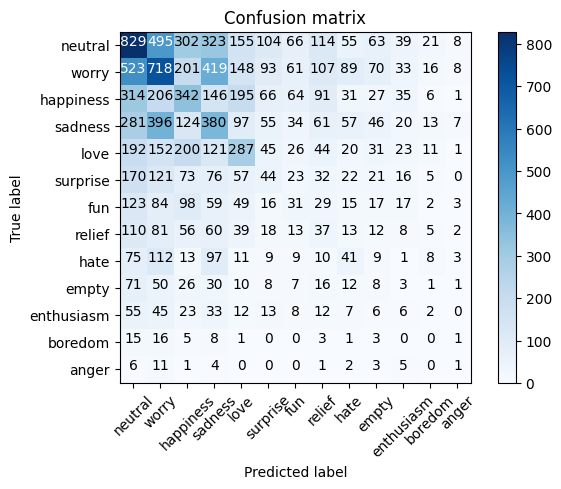

In [ ]:
plot_confusion_matrix(cm,class_names)

In [ ]:
# Classication Report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

         0.0       0.30      0.32      0.31      2574
         1.0       0.29      0.29      0.29      2486
         2.0       0.23      0.22      0.23      1524
         3.0       0.22      0.24      0.23      1571
         4.0       0.27      0.25      0.26      1153
         5.0       0.09      0.07      0.08       660
         6.0       0.09      0.06      0.07       543
         7.0       0.07      0.08      0.07       454
         8.0       0.11      0.10      0.11       398
         9.0       0.03      0.03      0.03       243
        10.0       0.03      0.03      0.03       222
        11.0       0.00      0.00      0.00        53
        12.0       0.03      0.03      0.03        34

    accuracy                           0.23     11915
   macro avg       0.13      0.13      0.13     11915
weighted avg       0.23      0.23      0.23     11915



In [ ]:
# Classication Report
print(classification_report(y_true,y_pred,target_names=class_names))

              precision    recall  f1-score   support

     neutral       0.30      0.32      0.31      2574
       worry       0.29      0.29      0.29      2486
   happiness       0.23      0.22      0.23      1524
     sadness       0.22      0.24      0.23      1571
        love       0.27      0.25      0.26      1153
    surprise       0.09      0.07      0.08       660
         fun       0.09      0.06      0.07       543
      relief       0.07      0.08      0.07       454
        hate       0.11      0.10      0.11       398
       empty       0.03      0.03      0.03       243
  enthusiasm       0.03      0.03      0.03       222
     boredom       0.00      0.00      0.00        53
       anger       0.03      0.03      0.03        34

    accuracy                           0.23     11915
   macro avg       0.13      0.13      0.13     11915
weighted avg       0.23      0.23      0.23     11915



In [ ]:
class_temp = predictions.select("label").groupBy("label")\
                        .count().sort('count', ascending=False).toPandas()
class_temp = class_temp["label"].values.tolist()
class_names = map(str, class_temp)
# # # print(class_name)
class_names

In [ ]:
#Making Single Prediction

In [ ]:
from pyspark.sql.types import StringType

In [ ]:
ex1 = spark.createDataFrame([
    ("Your greatest glory is not in always falling but in rising every time you fall",StringType())
],
# Column Name
["content"]

)

In [ ]:
ex1.show()

+--------------------+---+
|             content| _2|
+--------------------+---+
|Your greatest glo...| {}|
+--------------------+---+



In [ ]:
pred_ex1 = lr_model.transform(ex1)

In [ ]:
pred_ex1.show()

+--------------------+---+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|             content| _2|            mytokens|     filtered_tokens|         rawFeatures|  vectorizedFeatures|       rawPrediction|         probability|prediction|
+--------------------+---+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|Your greatest glo...| {}|[your, greatest, ...|[greatest, glory,...|(56877,[19,82,249...|(56877,[19,82,249...|[-2.8189781460936...|[7.03641702920245...|       4.0|
+--------------------+---+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+



In [ ]:
pred_ex1.columns

['content',
 '_2',
 'mytokens',
 'filtered_tokens',
 'rawFeatures',
 'vectorizedFeatures',
 'rawPrediction',
 'probability',
 'prediction']

In [ ]:
pred_ex1.select('content','rawPrediction','probability','prediction').show()

+--------------------+--------------------+--------------------+----------+
|             content|       rawPrediction|         probability|prediction|
+--------------------+--------------------+--------------------+----------+
|Your greatest glo...|[-2.8189781460936...|[7.03641702920245...|       4.0|
+--------------------+--------------------+--------------------+----------+



In [ ]:
label_dict

{'neutral': 0.0,
 'worry': 1.0,
 'happiness': 2.0,
 'sadness': 3.0,
 'love': 4.0,
 'surprise': 5.0,
 'fun': 6.0,
 'relief': 7.0,
 'hate': 8.0,
 'empty': 9.0,
 'enthusiasm': 10.0,
 'boredom': 11.0,
 'anger': 12.0}

In [ ]:
#naivebyas

In [ ]:
from pyspark.ml.classification import NaiveBayes

In [ ]:
nb = NaiveBayes(featuresCol='vectorizedFeatures',labelCol='label')

In [ ]:
pipeline = Pipeline(stages=[tokenizer,stopword_remover,vectorizer,idf,nb])

In [ ]:
pipeline

Pipeline_f2ec36e26d0d

In [ ]:
pipeline.stages

Param(parent='Pipeline_f2ec36e26d0d', name='stages', doc='a list of pipeline stages')

In [ ]:
nb_model = pipeline.fit(trainDF)

In [ ]:
nb_model

PipelineModel_0b85df7ddcff

In [ ]:
predictions = lr_model.transform(testDF)

In [ ]:
predictions.show()

+--------------------+----------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|             content| sentiment|label|            mytokens|     filtered_tokens|         rawFeatures|  vectorizedFeatures|       rawPrediction|         probability|prediction|
+--------------------+----------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|#3wordsaftersex I...|   sadness|  3.0|[#3wordsaftersex,...|[#3wordsaftersex,...|(56877,[473,5106]...|(56877,[473,5106]...|[8.55460647939477...|[2.84644223141026...|       3.0|
|#3wordsaftersex i...|   sadness|  3.0|[#3wordsaftersex,...|[#3wordsaftersex,...|(56877,[63,5106],...|(56877,[63,5106],...|[15.0237728367405...|[9.50653650672851...|       3.0|
|#Ajax #php! Just ...|     worry|  1.0|[#ajax, #php!, ju...|[#ajax, #php!, th...|(56877,[86,236,49...|(56877,[86,23

In [ ]:
predictions.columns

['content',
 'sentiment',
 'label',
 'mytokens',
 'filtered_tokens',
 'rawFeatures',
 'vectorizedFeatures',
 'rawPrediction',
 'probability',
 'prediction']

In [ ]:
predictions.select('rawPrediction','probability','sentiment','label','prediction').show(10)

+--------------------+--------------------+---------+-----+----------+
|       rawPrediction|         probability|sentiment|label|prediction|
+--------------------+--------------------+---------+-----+----------+
|[8.55460647939477...|[2.84644223141026...|  sadness|  3.0|       3.0|
|[15.0237728367405...|[9.50653650672851...|  sadness|  3.0|       3.0|
|[1.45547326937356...|[1.26183843001997...|    worry|  1.0|       1.0|
|[-2.4002283711888...|[2.47386194078386...|     hate|  8.0|       1.0|
|[-6.0586262753878...|[6.49182338296164...|    worry|  1.0|       1.0|
|[-47.105279973346...|[1.52066013242034...|  neutral|  0.0|       1.0|
|[-0.2359934182387...|[6.14475922485804...|    worry|  1.0|       3.0|
|[18.1098355652949...|[0.03533153747567...|  neutral|  0.0|       7.0|
|[2.52449644896947...|[5.67815719571314...|    worry|  1.0|       7.0|
|[6.18681356014903...|[6.89974843309266...|    worry|  1.0|       2.0|
+--------------------+--------------------+---------+-----+----------+
only s

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol='label',predictionCol='prediction',metricName='accuracy')

In [ ]:
accuracy = evaluator.evaluate(predictions)

In [ ]:
accuracy

0.22861938732689888